In [23]:
import pandas as pd

In [24]:
data = pd.read_csv("WFC.csv")

In [25]:
data.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,01-06-1972,0.880208,0.000000,249600,0.882812,0.880208,0.154219
1,02-06-1972,0.882812,0.882812,172800,0.890625,0.882812,0.154675
2,05-06-1972,0.880208,0.882812,302400,0.895833,0.895833,0.156957
3,06-06-1972,0.893229,0.895833,196800,0.911458,0.895833,0.156957
4,07-06-1972,0.888021,0.895833,48000,0.895833,0.888021,0.155588


In [26]:
data.tail()

,Date,Low,Open,Volume,High,Close,Adjusted Close
12380,06-07-2021,43.299999,44.730000,25486900,44.820000,43.490002,43.490002
12381,07-07-2021,43.119999,43.279999,21884000,43.970001,43.400002,43.400002
12382,08-07-2021,41.970001,42.580002,29148700,42.950001,42.320000,42.320000
12383,09-07-2021,42.849998,43.180000,25047000,44.110001,43.910000,43.910000
12384,12-07-2021,42.955002,43.279999,17514019,44.250000,44.160000,44.160000


In [27]:
data.dtypes

Date               object
Low               float64
Open              float64
Volume              int64
High              float64
Close             float64
Adjusted Close    float64
dtype: object

In [28]:
data.isna().any()

Date              False
Low               False
Open              False
Volume            False
High              False
Close             False
Adjusted Close    False
dtype: bool

In [29]:
df=pd.read_csv("WFC.csv",parse_dates=['Date'],index_col= ['Date'])
df.head()

,Low,Open,Volume,High,Close,Adjusted Close
Date,,,,,,
1972-01-06,0.880208,0.000000,249600,0.882812,0.880208,0.154219
1972-02-06,0.882812,0.882812,172800,0.890625,0.882812,0.154675
1972-05-06,0.880208,0.882812,302400,0.895833,0.895833,0.156957
1972-06-06,0.893229,0.895833,196800,0.911458,0.895833,0.156957
1972-07-06,0.888021,0.895833,48000,0.895833,0.888021,0.155588


In [30]:
data_2000_2021 = df['2000-01-01':'2021-12-07']
data_2000_2021.head()

C:\Users\vijay\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  """Entry point for launching an IPython kernel.


,Low,Open,Volume,High,Close,Adjusted Close
Date,,,,,,
2000-03-01,19.00000,20.15625,9037000,20.18750,19.56250,10.768756
2000-04-01,18.00000,18.62500,15237200,18.84375,18.59375,10.235478
2000-05-01,18.03125,18.50000,8228200,18.87500,18.40625,10.132262
2000-06-01,18.46875,18.53125,8326800,19.50000,19.21875,10.579529
2000-07-01,19.28125,19.62500,7711200,19.84375,19.56250,10.768756


In [31]:
data_2000_2021.tail()

,Low,Open,Volume,High,Close,Adjusted Close
Date,,,,,,
2021-06-07,43.299999,44.730000,25486900,44.820000,43.490002,43.490002
2021-07-07,43.119999,43.279999,21884000,43.970001,43.400002,43.400002
2021-08-07,41.970001,42.580002,29148700,42.950001,42.320000,42.320000
2021-09-07,42.849998,43.180000,25047000,44.110001,43.910000,43.910000
2021-12-07,42.955002,43.279999,17514019,44.250000,44.160000,44.160000


In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col_names = ['Low','Open','Volume','High','Close','Adjusted Close']
features = data_2000_2021[col_names]
features_scaled = scaler.fit_transform(features.values)
#data_2000_2021.values[:] = scaler.fit_transform(data_2000_2021)

In [33]:
data_scaled = pd.DataFrame(features_scaled, index=data_2000_2021.index,columns = col_names)
data_scaled

,Low,Open,Volume,High,Close,Adjusted Close
Date,,,,,,
2000-03-01,-1.391132,-1.325637,-0.556833,-1.353918,-1.375913,-1.331793
2000-04-01,-1.476332,-1.456103,-0.330460,-1.468288,-1.458436,-1.373647
2000-05-01,-1.473670,-1.466753,-0.586363,-1.465628,-1.474408,-1.381748
2000-06-01,-1.436395,-1.464091,-0.582763,-1.412433,-1.405196,-1.346644
2000-07-01,-1.367169,-1.370901,-0.605239,-1.383175,-1.375913,-1.331793
...,...,...,...,...,...,...
2021-06-07,0.679240,0.768111,0.043763,0.742604,0.662335,1.236332
2021-07-07,0.663904,0.644567,-0.087781,0.670259,0.654668,1.229268
2021-08-07,0.565924,0.584925,0.177458,0.583445,0.562669,1.144504


In [34]:
X=data_scaled.index
y=data_scaled['Adjusted Close']

In [35]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244

In [36]:
# Checking stationarity of the data
from statsmodels.tsa.stattools import adfuller
#series = pd.read_csv('WFC.csv', header=0, index_col=0, squeeze=True)
series = data_2000_2021['Adjusted Close']
series


Date
2000-03-01    10.768756
2000-04-01    10.235478
2000-05-01    10.132262
2000-06-01    10.579529
2000-07-01    10.768756
                ...    
2021-06-07    43.490002
2021-07-07    43.400002
2021-08-07    42.320000
2021-09-07    43.910000
2021-12-07    44.160000
Name: Adjusted Close, Length: 5415, dtype: float64

In [37]:
Z = series.values
result = adfuller(Z)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.656701
p-value: 0.453548
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [38]:
from numpy import log
Z = series.values
Z = log(Z)
result = adfuller(Z)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.171147
p-value: 0.216884
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [39]:
df_diff = series.diff().diff(1).dropna()
df_diff

Date
2000-05-01    0.430061
2000-06-01    0.550483
2000-07-01   -0.258039
2000-10-01   -0.533277
2000-11-01    0.172022
                ...   
2021-06-07   -1.239998
2021-07-07    1.489998
2021-08-07   -0.990002
2021-09-07    2.670002
2021-12-07   -1.340000
Name: Adjusted Close, Length: 5413, dtype: float64

In [40]:
Z = df_diff.values
result = adfuller(Z)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -22.790374
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


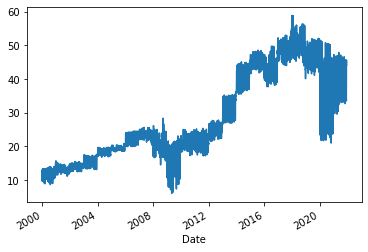

In [41]:
from matplotlib import pyplot
series.plot()
pyplot.show()

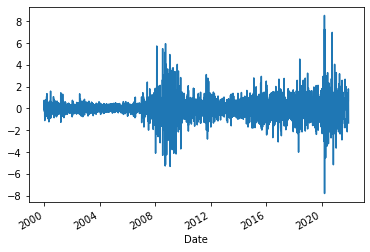

In [42]:
df_diff.plot()
pyplot.show()

C:\Users\vijay\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


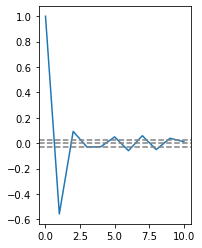

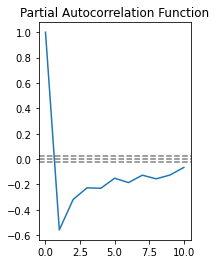

<Figure size 432x288 with 0 Axes>

In [43]:
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pylab as plt

lag_acf = acf(df_diff, nlags=10)
lag_pacf = pacf(df_diff, nlags=10, method='ols')

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_diff)),linestyle='--',color='gray')
plt.show()
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()
plt.tight_layout()

# AR Model

C:\Users\vijay\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\vijay\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


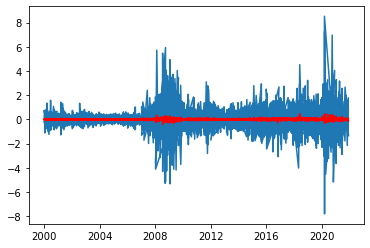

In [44]:
from statsmodels.tsa.arima_model import ARIMA

model_1 = ARIMA(series, order=(1, 1, 0), freq=series.index.inferred_freq)  
results_AR = model_1.fit(disp=-1)  
plt.plot(df_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.show()

In [56]:
model_1.fit(X_train,y_train)
y_pred=model_1.predict(X_test)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [57]:
X_train

DatetimeIndex(['2000-03-01', '2000-04-01', '2000-05-01', '2000-06-01',
               '2000-07-01', '2000-10-01', '2000-11-01', '2000-12-01',
               '2000-01-13', '2000-01-14',
               ...
               '2017-11-24', '2017-11-27', '2017-11-28', '2017-11-29',
               '2017-11-30', '2017-01-12', '2017-04-12', '2017-05-12',
               '2017-06-12', '2017-07-12'],
              dtype='datetime64[ns]', name='Date', length=4513, freq=None)

# MA model

C:\Users\vijay\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\vijay\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


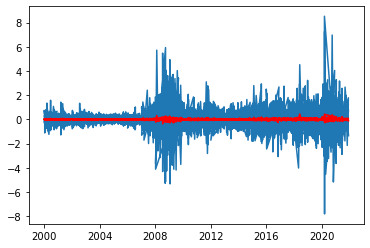

In [58]:
model_2 = ARIMA(series, order=(0, 1, 1), freq=series.index.inferred_freq)  
results_MA = model_2.fit(disp=-1)  
plt.plot(df_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.show()

# Arima Model

C:\Users\vijay\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\vijay\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


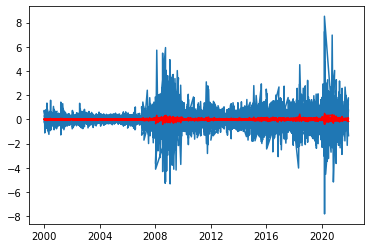

In [59]:
model_3 = ARIMA(series, order=(1, 1, 1), freq=series.index.inferred_freq)  
results_ARIMA = model_3.fit(disp=-1)
plt.plot(df_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.plot(figsize=(25,10))
plt.show()